<h2 style="background-color:lightgreen; color:black; text-align:center;
    font-size:50px; font-weight:bold;padding:10px;">AMAZON PRODUCT REVIEW</h1> 

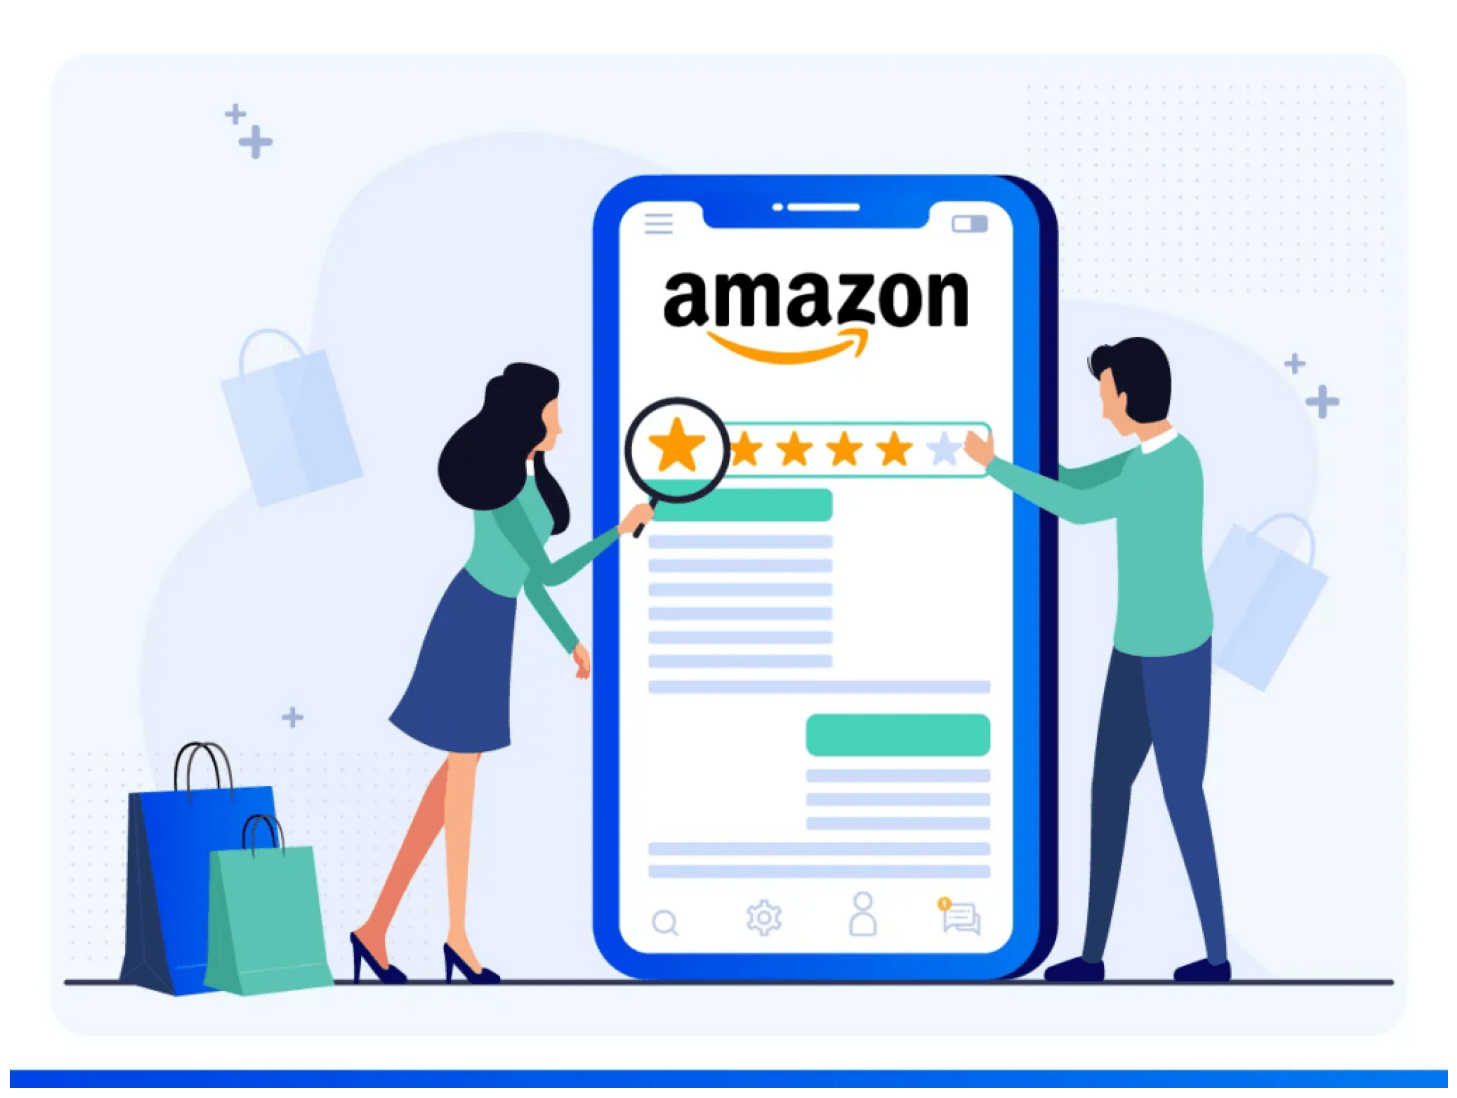

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(r"C:\Users\Hp\Pictures\How-to-get-good-amazon-product-reviews-1024x768.webp")

plt.figure(figsize=(22, 14))   # Bigger = larger image
plt.imshow(img)
plt.axis('off')
plt.show()

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

<h2 style="background-color:white; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">Reading the Dataset</h1> 

In [3]:
df=pd.read_csv(r"C:\Users\Hp\Downloads\Amazon-Product-Reviews - Amazon Product Review (1).csv\Amazon-Product-Reviews - Amazon Product Review (1).csv")

In [4]:
df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30841,US,44834233,R366C7ARIWLN7R,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,3720,3875,N,Y,A great upgrade for me from an older Kindle Fire!,[[VIDEOID:moP3B6GS5RL8LY]]I purchased the orig...,2014-10-03,1
30842,US,13376158,R35PL0AOCUXLU9,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,2716,2849,N,Y,Great Value for $139,I'm writing this review with the benefit of be...,2014-10-03,1
30843,US,40485963,R18ZJVY86AUFII,B00KC6XV58,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,1525,1629,N,Y,Even grandma has it figured out!,"I purchased this Kindle for my grandma, becaus...",2014-10-03,1
30844,US,33485035,R36QVLQXMCZRSJ,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,143,163,N,Y,The Honda Accord of Tablets,I bought my tablet Fire HD 7 at Best Buy on th...,2014-10-03,1


<style>
td, th { padding:10px; }
th { background:#8B0000; color:white; }
tr:nth-child(even) { background:#ffe6e6; }
tr:nth-child(odd) { background:#ffffff; }
</style>

<table>
<tr>
<th>Column Name</th><th>Description</th>
</tr>

<tr>
<td><b>marketplace</b></td>
<td>Country marketplace where the review was posted</td>
</tr>

<tr>
<td><b>customer_id</b></td>
<td>Unique identifier for each customer</td>
</tr>

<tr>
<td><b>review_id</b></td>
<td>Unique identifier for each review</td>
</tr>

<tr>
<td><b>product_id</b></td>
<td>Unique identifier for the product</td>
</tr>

<tr>
<td><b>product_parent</b></td>
<td>Parent ID grouping product variations</td>
</tr>

<tr>
<td><b>product_title</b></td>
<td>Name/title of the product</td>
</tr>

<tr>
<td><b>product_category</b></td>
<td>Category of the product (e.g., Electronics, Books)</td>
</tr>

<tr>
<td><b>star_rating</b></td>
<td>Rating given by the customer (1–5 stars)</td>
</tr>

<tr>
<td><b>helpful_votes</b></td>
<td>Number of helpful votes received</td>
</tr>

<tr>
<td><b>total_votes</b></td>
<td>Total votes (helpful + not helpful)</td>
</tr>

<tr>
<td><b>vine</b></td>
<td>Indicates if review is part of Vine program (Y/N)</td>
</tr>

<tr>
<td><b>verified_purchase</b></td>
<td>Indicates if purchase was verified (Y/N)</td>
</tr>

<tr>
<td><b>review_headline</b></td>
<td>Short summary/title of the review</td>
</tr>

<tr>
<td><b>review_body</b></td>
<td>Full text of the review</td>
</tr>

<tr>
<td><b>review_date</b></td>
<td>Date when review was posted</td>
</tr>

<tr>
<td><b>sentiment</b></td>
<td>Sentiment label (0 = Negative, 1 = Positive)</td>
</tr>

</table>


<h2 style="background-color:white; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">Checking column,shape,info</h1> 

In [5]:
df.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date', 'sentiment'],
      dtype='object')

In [6]:
df.shape

(30846, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30846 entries, 0 to 30845
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        30846 non-null  object
 1   customer_id        30846 non-null  int64 
 2   review_id          30846 non-null  object
 3   product_id         30846 non-null  object
 4   product_parent     30846 non-null  int64 
 5   product_title      30846 non-null  object
 6   product_category   30846 non-null  object
 7   star_rating        30846 non-null  int64 
 8   helpful_votes      30846 non-null  int64 
 9   total_votes        30846 non-null  int64 
 10  vine               30846 non-null  object
 11  verified_purchase  30846 non-null  object
 12  review_headline    30844 non-null  object
 13  review_body        30842 non-null  object
 14  review_date        30846 non-null  object
 15  sentiment          30846 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 3.

<h2 style="background-color:white; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">Missing value handling</h1> 

In [8]:
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      2
review_body          4
review_date          0
sentiment            0
dtype: int64

In [9]:
df['review_headline'] = df['review_headline'].fillna('')
df['review_body'] = df['review_body'].fillna('')

In [10]:
for i in df:
    print([i])
    print(df[i].unique())
    print(df[i].nunique())

['marketplace']
['US']
1
['customer_id']
[11555559 31469372 26843895 ... 40485963 33485035  7015231]
30845
['review_id']
['R1QXC7AHHJBQ3O' 'R175VSRV6ZETOP' 'R2HRFF78MWGY19' ... 'R18ZJVY86AUFII'
 'R36QVLQXMCZRSJ' 'R1MWVQUDBUADGE']
30846
['product_id']
['B00IKPX4GY' 'B00IKPYKWG' 'B00IKPW0UA' 'B00LCHSHMS' 'B00IKPZ5V6'
 'B00LCHRQL6' 'B00LCI2I7C' 'B00LCHS1FG' 'B00LCHOCZY' 'B00KC6XV58'
 'B00KC72CRU' 'B00KC89C2C' 'B00LCHWEPE' 'B00LCHNGZG' 'B00LCHNAA2'
 'B00KC88MSC' 'B00LCHW422' 'B00KC6Y1MU' 'B00LCHYFB0' 'B00LCHN19C'
 'B00LCI3LUA']
21
['product_parent']
[2693241]
1
['product_title']
['Fire HD 7, 7" HD Display, Wi-Fi, 8 GB']
1
['product_category']
['PC']
1
['star_rating']
[5 3 4 2 1]
5
['helpful_votes']
[   0    1    2    4    3    5   20    7   56    9    8   15    6   16
   59   53  499   10   25   13   17   21  176   33 1305   36   11   26
   24   75   12   30   71   18   19  118   52  156  134 1643   58   27
   44   31   82  160  119   50  100  109   38  116  142  144  588   14
  111  193  

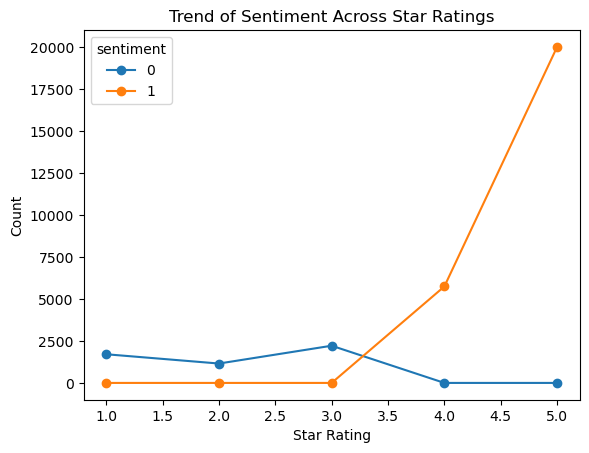

In [11]:
rating_sentiment = pd.crosstab(df['star_rating'], df['sentiment'])

rating_sentiment.plot(marker='o')

plt.title("Trend of Sentiment Across Star Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.show()

In [12]:
cols_to_drop = ['marketplace','customer_id','review_id','product_id','product_parent','product_title','vine']

In [13]:
df = df.drop(columns=cols_to_drop)
df

,product_category,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body,review_date,sentiment
0,PC,5,0,0,Y,Five Stars,Great love it,2015-08-31,1
1,PC,3,0,0,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0
2,PC,5,0,0,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1
3,PC,4,0,0,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1
4,PC,5,0,0,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1
...,...,...,...,...,...,...,...,...,...
30841,PC,5,3720,3875,Y,A great upgrade for me from an older Kindle Fire!,[[VIDEOID:moP3B6GS5RL8LY]]I purchased the orig...,2014-10-03,1
30842,PC,5,2716,2849,Y,Great Value for $139,I'm writing this review with the benefit of be...,2014-10-03,1
30843,PC,5,1525,1629,Y,Even grandma has it figured out!,"I purchased this Kindle for my grandma, becaus...",2014-10-03,1
30844,PC,4,143,163,Y,The Honda Accord of Tablets,I bought my tablet Fire HD 7 at Best Buy on th...,2014-10-03,1


<h2 style="background-color:white; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">Data set cleaning</h1> 

In [14]:
def clean_review(text):
    text = text.lower()                          # lowercase
    text = re.sub(r'<.*?>', '', text)            # remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)         # remove punctuation & numbers
    text = re.sub(r'\s+', ' ', text).strip()     # remove extra spaces
    return text


In [15]:
df['review_body'] = df['review_body'].apply(clean_review)

In [16]:
punctuation=string.punctuation
stopwords=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()

def clean(text):
    words=word_tokenize(text)
    words=[word for word in words if word not in stopwords and word not in punctuation]
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)

In [17]:
df["review_body"]=df["review_body"].apply(clean)

<h2 style="background-color:white; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">Model Building</h1> 

In [18]:
X = df['review_body']  
y = df['sentiment']      

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

<h2 style="background-color:white; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">TfidfVectorizer in LinearSVC</h1> 

In [20]:
tfidf = TfidfVectorizer()
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

In [21]:
model = LinearSVC()
model.fit(X_train_vec, y_train)                           # linear svc
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9055105348460292


<h2 style="background-color:white; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">TfidfVectorizer in LogisticRegression</h1> 

In [22]:
log_reg = LogisticRegression(max_iter=1000,solver='liblinear')                                      # logistic
log_reg.fit(X_train_vec, y_train)
y_pred = log_reg.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9089141004862237


<h2 style="background-color:white; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">TfidfVectorizer in MultinomialNB</h1> 

In [23]:
navie= MultinomialNB()                     # naive
navie.fit(X_train_vec, y_train)
y_pred1 = navie.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred1))

Accuracy: 0.8559157212317666


<h2 style="background-color:white; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">TfidfVectorizer in RandomForestClassifier</h1> 

In [24]:
rf = RandomForestClassifier()
rf.fit(X_train_vec, y_train)                          # randomforest
y_pred2 = rf.predict(X_test_vec) 
print("Accuracy:", accuracy_score(y_test, y_pred2))

Accuracy: 0.8834683954619125


<h2 style="background-color:white; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">CountVectorizer in LogisticRegression</h1> 

In [25]:
cv = CountVectorizer()

X_train_vec1 = cv.fit_transform(X_train)
X_test_vec1 = cv.transform(X_test)

In [26]:
log_reg1 = LogisticRegression(max_iter=1000,solver='liblinear')                                      # logistic
log_reg1.fit(X_train_vec1, y_train)
y_pred3 = log_reg1.predict(X_test_vec1)
print("Accuracy:", accuracy_score(y_test, y_pred3))

Accuracy: 0.9063209076175041


<h2 style="background-color:white; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">CountVectorizer in LinearSVC</h1> 

In [27]:
model1 = LinearSVC()
model1.fit(X_train_vec1, y_train)
y_pred4 = model1.predict(X_test_vec1)                        # linear
print("Accuracy:", accuracy_score(y_test, y_pred4))

Accuracy: 0.8991896272285251


<h2 style="background-color:white; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">CountVectorizer in MultinomialNB</h1> 

In [28]:
navie1= MultinomialNB()                     # naive
navie1.fit(X_train_vec1, y_train)
y_pred5 = navie1.predict(X_test_vec1)
print("Accuracy:", accuracy_score(y_test, y_pred5))

Accuracy: 0.9032414910858995


<h2 style="background-color:white; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">CountVectorizer in RandomForestClassifier</h1> 

In [29]:
rf1 = RandomForestClassifier()
rf1.fit(X_train_vec1, y_train)                          # randomforest
y_pred6 = rf1.predict(X_test_vec1) 
print("Accuracy:", accuracy_score(y_test, y_pred6))

Accuracy: 0.8891410048622367


<h2 style="background-color:white; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">Prediction based on TfidfVectorizer linearsvc</h1> 

In [30]:
review = ["Great love it"]

In [31]:
new_review_vec = tfidf.transform(review)
prediction = log_reg.predict(new_review_vec)
if prediction[0] == 1:
    print("\033[92m✔ POSITIVE REVIEW 😀🎉\033[0m")
else:
    print("\033[91m✘ NEGATIVE REVIEW 😡💀\033[0m")


✔ POSITIVE REVIEW 😀🎉
